In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\Sreelakshmi\\Desktop\\accident_prediction_india.csv")
df.head()

,Accident_ID,Accident Severity,Age_Group,Alcohol Involvement,Day of Week,Driver Gender,Helmet_or_Seatbelt,Month,Number of Casualties,Number of Fatalities,...,Road Type,Speed,State Name,Time of Day,Traffic Control Presence,Vehicle_Type,Weather_Condition,Year,Vehicle_Category,Factor_Combo
0,ACC00001,Fatal,15-24,Yes,Thursday,Female,Yes,September,1,1,...,National Highway,71,Goa,17:01:00,Signal,Van,Stormy,2025,Few,National Highway | Yes | Yes | Signal | Few
1,ACC00002,Fatal,15-24,Yes,Saturday,Male,No,January,2,1,...,State Highway,91,Uttar Pradesh,22:21:00,Signal,Truck,Foggy,2021,Few,State Highway | Yes | No | Signal | Few
2,ACC00003,Fatal,15-24,Yes,Monday,Male,Yes,June,8,4,...,National Highway,102,Uttar Pradesh,20:59:00,Signal,Auto,Rainy,2024,Few,National Highway | Yes | Yes | Signal | Few
3,ACC00004,Fatal,15-24,Yes,Sunday,Male,No,September,3,1,...,Village Road,40,Tamil Nadu,05:12:00,Signal,Bike,Rainy,2025,Few,Village Road | Yes | No | Signal | Few
4,ACC00005,Fatal,25-44,Yes,Sunday,Male,No,April,3,1,...,National Highway,41,Uttar Pradesh,12:10:00,Sign,Bike,Cloudy,2022,Few,National Highway | Yes | No | Sign | Few


In [3]:
df.shape 
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Accident_ID               5000 non-null   object
 1   Accident Severity         5000 non-null   object
 2   Age_Group                 5000 non-null   object
 3   Alcohol Involvement       5000 non-null   object
 4   Day of Week               5000 non-null   object
 5   Driver Gender             5000 non-null   object
 6   Helmet_or_Seatbelt        5000 non-null   object
 7   Month                     5000 non-null   object
 8   Number of Casualties      5000 non-null   int64 
 9   Number of Fatalities      5000 non-null   int64 
 10  Number_of_Vehicles        5000 non-null   int64 
 11  Road Type                 5000 non-null   object
 12  Speed                     5000 non-null   int64 
 13  State Name                5000 non-null   object
 14  Time of Day             

,Number of Casualties,Number of Fatalities,Number_of_Vehicles,Speed,Year
count,5000.0000,5000.00000,5000.000000,5000.000000,5000.000000
mean,3.5286,1.76380,2.213200,67.154400,2022.878400
std,1.7571,1.12635,0.634844,29.404937,1.679696
min,0.0000,0.00000,1.000000,20.000000,2020.000000
25%,2.0000,1.00000,2.000000,40.000000,2022.000000
50%,3.0000,2.00000,2.000000,65.000000,2023.000000
75%,4.0000,2.00000,3.000000,93.000000,2024.000000
max,9.0000,5.00000,3.000000,120.000000,2025.000000


In [8]:
df['Hour'] = pd.to_datetime(df['Time of Day'], errors='coerce').dt.hour
df.head()

,Accident_ID,Accident Severity,Age_Group,Alcohol Involvement,Day of Week,Driver Gender,Helmet_or_Seatbelt,Month,Number of Casualties,Number of Fatalities,...,Speed,State Name,Time of Day,Traffic Control Presence,Vehicle_Type,Weather_Condition,Year,Vehicle_Category,Factor_Combo,Hour
0,ACC00001,Fatal,15-24,Yes,Thursday,Female,yes,September,1,1,...,71,Goa,17:01:00,Signal,Van,stormy,2025,Few,National Highway | Yes | Yes | Signal | Few,17
1,ACC00002,Fatal,15-24,Yes,Saturday,Male,no,January,2,1,...,91,Uttar Pradesh,22:21:00,Signal,Truck,foggy,2021,Few,State Highway | Yes | No | Signal | Few,22
2,ACC00003,Fatal,15-24,Yes,Monday,Male,yes,June,8,4,...,102,Uttar Pradesh,20:59:00,Signal,Auto,rainy,2024,Few,National Highway | Yes | Yes | Signal | Few,20
3,ACC00004,Fatal,15-24,Yes,Sunday,Male,no,September,3,1,...,40,Tamil Nadu,05:12:00,Signal,Bike,rainy,2025,Few,Village Road | Yes | No | Signal | Few,5
4,ACC00005,Fatal,25-44,Yes,Sunday,Male,no,April,3,1,...,41,Uttar Pradesh,12:10:00,Sign,Bike,cloudy,2022,Few,National Highway | Yes | No | Sign | Few,12


In [9]:
def categorize_hour(hour):
    if pd.isnull(hour):
        return "Unknown"
    elif 0 <= hour < 6:
        return "Late Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"
df['Time Category'] = df['Hour'].apply(categorize_hour)
df.head()

,Accident_ID,Accident Severity,Age_Group,Alcohol Involvement,Day of Week,Driver Gender,Helmet_or_Seatbelt,Month,Number of Casualties,Number of Fatalities,...,State Name,Time of Day,Traffic Control Presence,Vehicle_Type,Weather_Condition,Year,Vehicle_Category,Factor_Combo,Hour,Time Category
0,ACC00001,Fatal,15-24,Yes,Thursday,Female,yes,September,1,1,...,Goa,17:01:00,Signal,Van,stormy,2025,Few,National Highway | Yes | Yes | Signal | Few,17,Afternoon
1,ACC00002,Fatal,15-24,Yes,Saturday,Male,no,January,2,1,...,Uttar Pradesh,22:21:00,Signal,Truck,foggy,2021,Few,State Highway | Yes | No | Signal | Few,22,Evening
2,ACC00003,Fatal,15-24,Yes,Monday,Male,yes,June,8,4,...,Uttar Pradesh,20:59:00,Signal,Auto,rainy,2024,Few,National Highway | Yes | Yes | Signal | Few,20,Evening
3,ACC00004,Fatal,15-24,Yes,Sunday,Male,no,September,3,1,...,Tamil Nadu,05:12:00,Signal,Bike,rainy,2025,Few,Village Road | Yes | No | Signal | Few,5,Late Night
4,ACC00005,Fatal,25-44,Yes,Sunday,Male,no,April,3,1,...,Uttar Pradesh,12:10:00,Sign,Bike,cloudy,2022,Few,National Highway | Yes | No | Sign | Few,12,Afternoon


In [6]:

yearly_counts = df['Year'].value_counts().sort_values(ascending=False)
print("Total accidents per year (descending):")
print(yearly_counts)


Total accidents per year (descending):
Year
2025    1099
2024    1029
2023     885
2022     750
2021     626
2020     611
Name: count, dtype: int64


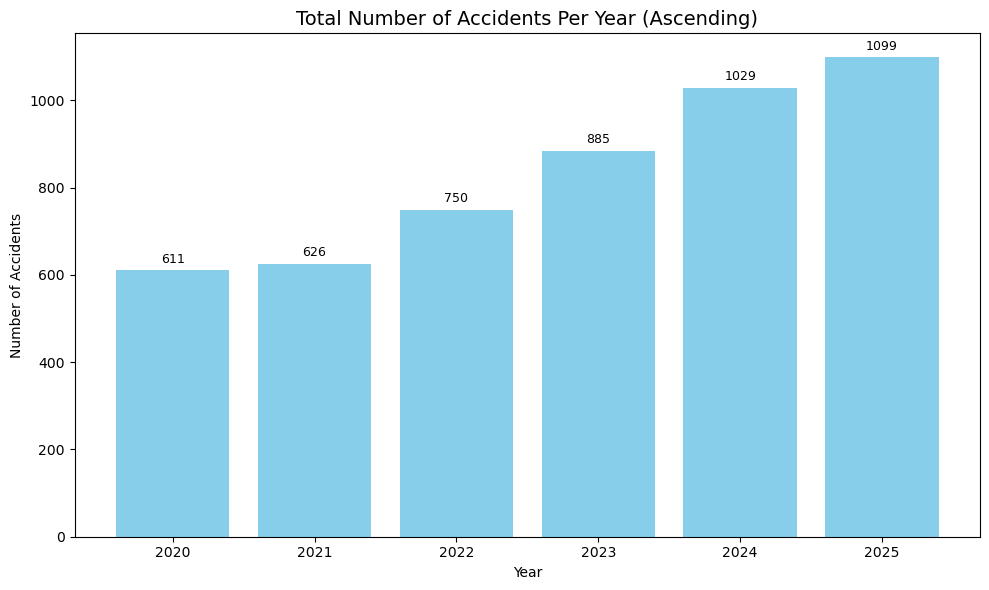

In [73]:
import matplotlib.pyplot as plt

# Step 1: Count total accidents per year and sort by year (ascending)
yearly_counts = df['Year'].value_counts().sort_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color='skyblue')

# Step 3: Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10,  # slight offset above bar
             f'{yval}', ha='center', va='bottom', fontsize=9)

# Step 4: Add titles and formatting
plt.title("Total Number of Accidents Per Year (Ascending)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()

# Step 5: Show the chart
plt.show()


In [75]:
fatal_by_state = df[df["Accident Severity"] == "Fatal"]['State Name'].value_counts().head(10)
print("Top 10 states with highest fatal accidents:")
print(fatal_by_state)


Top 10 states with highest fatal accidents:
State Name
Uttar Pradesh    814
Goa              624
Tamil Nadu       571
Bihar            264
Delhi            258
Karnataka        245
Kerala           240
Rajasthan        237
Maharashtra      225
Name: count, dtype: int64


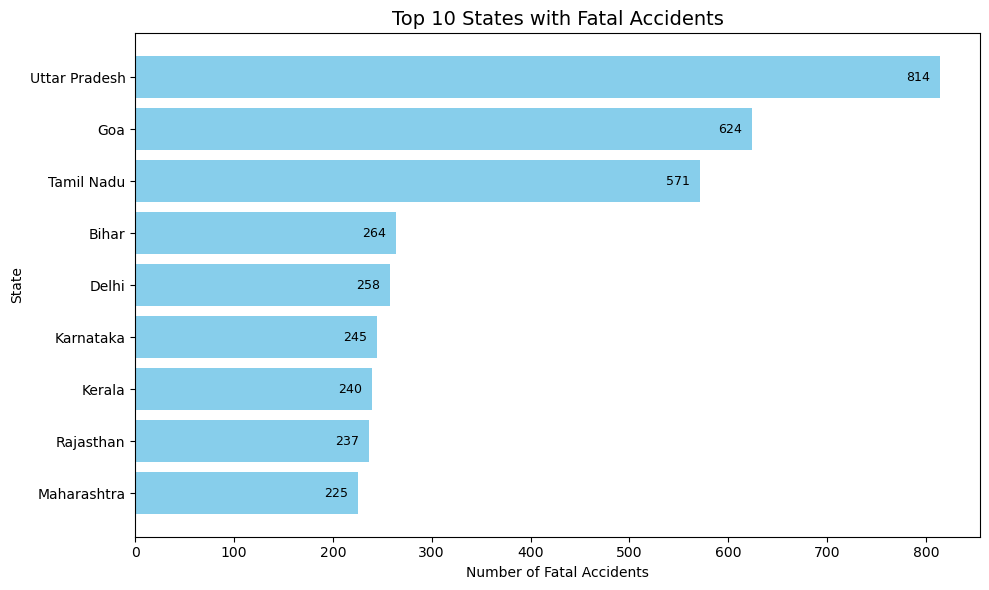

In [77]:
import matplotlib.pyplot as plt

# Step 1: Get top 10 states by fatal accidents
fatal_by_state = df[df['Accident Severity'] == 'Fatal']['State Name'].value_counts().head(10)

# Step 2: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(fatal_by_state.index, fatal_by_state.values, color='skyblue')

# Step 3: Add value labels INSIDE each bar (to the right)
for bar in bars:
    width = bar.get_width()
    plt.text(width - 10,                    # Move inside the bar
             bar.get_y() + bar.get_height()/2,
             f'{width}', 
             va='center', ha='right',        # Align to right inside the bar
             color='black', fontsize=9)

# Step 4: Invert y-axis so highest is on top
plt.gca().invert_yaxis()

# Step 5: Titles and formatting
plt.title("Top 10 States with Fatal Accidents", fontsize=14)
plt.xlabel("Number of Fatal Accidents")
plt.ylabel("State")
plt.tight_layout()

# Step 6: Show chart
plt.show()



In [9]:
print(pd.crosstab(df['Traffic Control Presence'], df['Accident Severity']))


Accident Severity         Fatal  Major  Minor
Traffic Control Presence                     
Police Checkpost            731    264      9
Sign                       1071    416     16
Signal                     1807    670     16


In [8]:

# Crosstab between Weather_Condition and Accident Severity
result = pd.crosstab(df['Weather_Condition'], df['Accident Severity'])

# Sort by Weather_Condition alphabetically
print(result.sort_index())


Accident Severity  Fatal  Major  Minor
Weather_Condition                     
Clear                533    165     15
Cloudy               798    212     26
Foggy                762    314      0
Rainy                864    382      0
Stormy               652    277      0


In [110]:

df['Time Category'] = df['Hour'].apply(categorize_hour)
print(df['Time Category'].value_counts())


Time Category
Late Night    1790
Evening       1594
Morning       1016
Afternoon      600
Name: count, dtype: int64


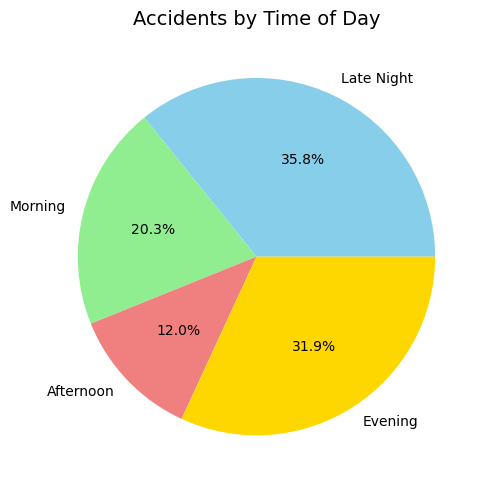

In [5]:
time_counts = df['Time Category'].value_counts().reindex(['Late Night', 'Morning', 'Afternoon', 'Evening'])

plt.figure(figsize=(8, 5))
plt.pie(time_counts.values, labels=time_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title("Accidents by Time of Day", fontsize=14)
plt.tight_layout()
plt.show()





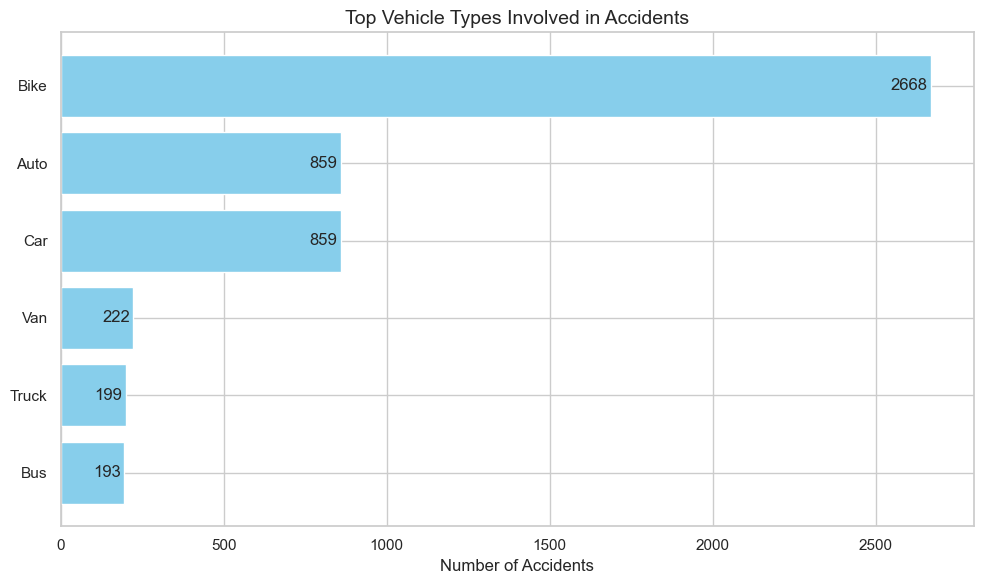

In [111]:
vehicle_counts = df['Vehicle_Type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(vehicle_counts.index, vehicle_counts.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width - 10, bar.get_y() + bar.get_height()/2, f'{width}', ha='right', va='center')
plt.gca().invert_yaxis()
plt.title("Top Vehicle Types Involved in Accidents", fontsize=14)
plt.xlabel("Number of Accidents")
plt.tight_layout()
plt.show()


In [16]:
print(pd.crosstab(df['Alcohol Involvement'], df['Accident Severity']))



Accident Severity    Fatal  Major
Alcohol Involvement              
No                    1116    373
Yes                   2362    893


In [112]:
# Frequency table to check seatbelt use against severity
seatbelt_vs_severity = pd.crosstab(df['Helmet_or_Seatbelt'], df['Accident Severity'])
print(seatbelt_vs_severity)


Accident Severity   Fatal  Major
Helmet_or_Seatbelt              
No                   2823   1012
Yes                   655    254


In [113]:
#GENDER WISE ACCIDENT SEVERITY
fatal_gender = df[df['Accident Severity'] == 'Fatal']['Driver Gender'].value_counts()
print(fatal_gender)


Driver Gender
Male      2792
Female     686
Name: count, dtype: int64


In [114]:
age_counts = df['Age_Group'].value_counts().sort_index()
print(age_counts)


Age_Group
0-14      249
15-24    2006
25-44    1251
45-64    1254
65+       240
Name: count, dtype: int64


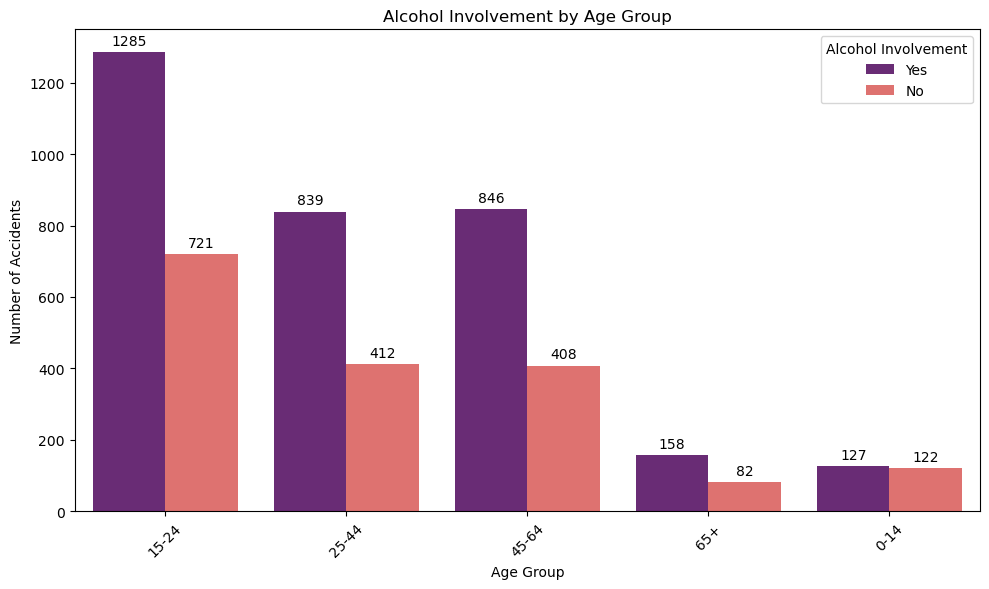

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age_Group', hue='Alcohol Involvement', palette='magma')

plt.title('Alcohol Involvement by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Alcohol Involvement')

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

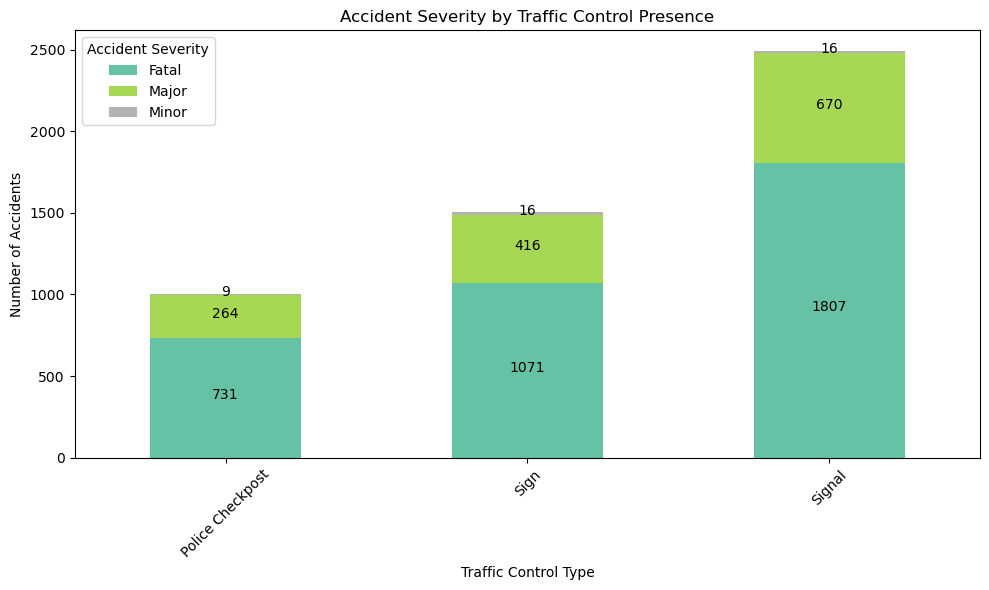

In [17]:
# Grouping and plotting
traffic_severity = df.groupby(['Traffic Control Presence', 'Accident Severity']).size().unstack().fillna(0)

ax = traffic_severity.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))

plt.title('Accident Severity by Traffic Control Presence')
plt.ylabel('Number of Accidents')
plt.xlabel('Traffic Control Type')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.tight_layout()

# Add labels to each segment in the stacked bars
for i, bar_group in enumerate(ax.containers):
    ax.bar_label(bar_group, fmt='%d', label_type='center', padding=2)

plt.show()


In [3]:
severity_counts = df['Accident Severity'].value_counts()
severity_percent = df['Accident Severity'].value_counts(normalize=True) * 100

severity_summary = pd.DataFrame({
    'Count': severity_counts,
    'Percentage (%)': severity_percent.round(2)
})

print(" Distribution of Accident Severity Types:")
print(severity_summary)


 Distribution of Accident Severity Types:
                   Count  Percentage (%)
Accident Severity                       
Fatal               3609           72.18
Major               1350           27.00
Minor                 41            0.82


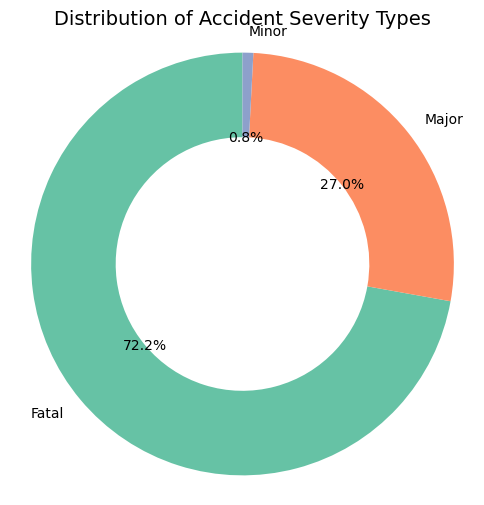

In [25]:

# Load the dataset
df = pd.read_csv("accident_prediction_india.csv")

# Count values
severity_counts = df['Accident Severity'].value_counts()

# Donut chart
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Optional: customize colors
plt.figure(figsize=(6, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops={'width': 0.4})

plt.title("Distribution of Accident Severity Types", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


In [28]:
pd.crosstab(df['Road Type'], df['Alcohol Involvement'])


Alcohol Involvement,No,Yes
Road Type,,
National Highway,741,1315
State Highway,543,951
Urban Road,308,638
Village Road,153,351


In [12]:
df.groupby(['Road Type', 'Weather_Condition', 'Alcohol Involvement'])['Number of Casualties']\
.sum().sort_values(ascending=False).head(10)


Road Type         Weather_Condition  Alcohol Involvement
National Highway  Rainy              Yes                    1303
                  Foggy              Yes                    1160
                  Stormy             Yes                     977
                  Cloudy             Yes                     940
                  Rainy              No                      842
State Highway     Rainy              Yes                     820
                  Foggy              Yes                     804
                  Stormy             Yes                     723
National Highway  Foggy              No                      715
State Highway     Cloudy             Yes                     670
Name: Number of Casualties, dtype: int64

In [13]:
# Define high-risk group: Foggy + Night (or Late Night) + No Helmet/Seatbelt
df_risky = df[
    (df['Weather_Condition'] == 'rainy') &
    (df['Time Category'].isin(['night', 'late night'])) &
    (df['Helmet_or_Seatbelt'] == 'no')
]

# Summarize risky group
total_risky = len(df_risky)
fatal_risky = df_risky['Fatal'].sum()
fatality_rate_risky = round((fatal_risky / total_risky) * 100, 2)

print(f"High-Risk Group: {total_risky} accidents, {fatal_risky} fatal, Fatality Rate = {fatality_rate_risky}%")


High-Risk Group: 358 accidents, 352 fatal, Fatality Rate = 98.32%


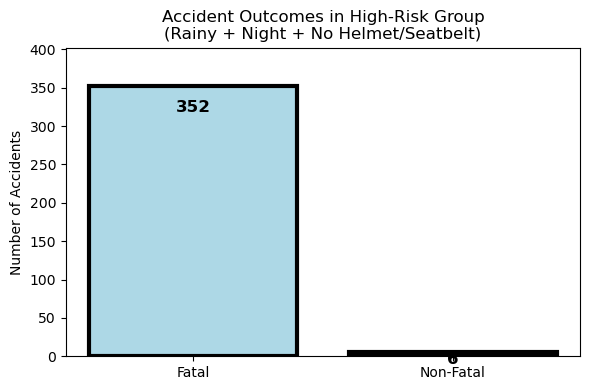

In [21]:

labels = ['Fatal', 'Non-Fatal']
counts = [fatal_risky, total_risky - fatal_risky]

plt.figure(figsize=(6, 4))
bars = plt.bar(
    labels,
    counts,
    color='lightblue',
    edgecolor='black',   # Thin black border
    linewidth=1.5        # Reduce thickness
)

# Add count labels inside the bars with dynamic placement
for bar in bars:
    yval = bar.get_height()
    position = yval - 10 if yval > 20 else yval + 5  # place inside if tall, above if small
    va = 'top' if yval > 20 else 'bottom'

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        position,
        int(yval),
        ha='center',
        va=va,
        fontsize=12,
        fontweight='bold',
        color='black'
    )

# Chart layout
plt.title('Accident Outcomes in High-Risk Group\n(Rainy + Night + No Helmet/Seatbelt)', fontsize=14)
plt.ylabel('Number of Accidents')
plt.ylim(0, max(counts) + 30)  # Add buffer space
plt.tight_layout()
plt.show()




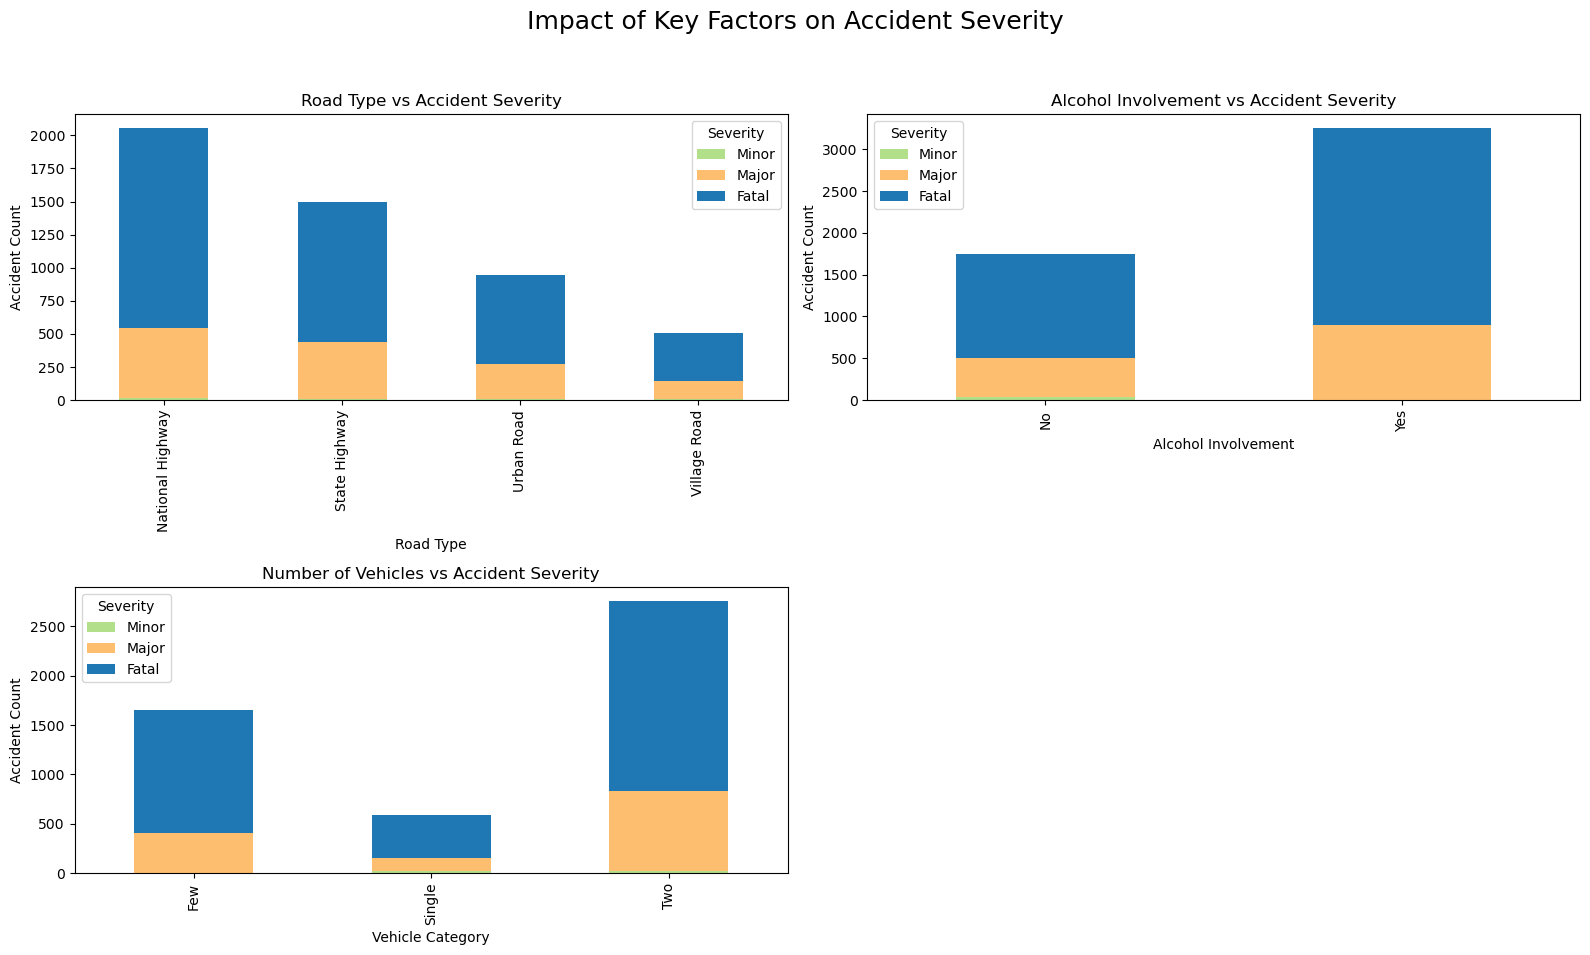

In [30]:
 #Define custom color palette: dark color for 'Fatal'
severity_order = ['Minor', 'Major', 'Fatal']
custom_colors = ['#B2DF8A', '#FDBF6F', '#1F78B4']  # light green, orange, dark blue for Fatal

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Impact of Key Factors on Accident Severity", fontsize=18)

# 1️ Road Type vs Severity
road = df.groupby(['Road Type', 'Accident Severity']).size().unstack().fillna(0)[severity_order]
road.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[0, 0])
axes[0, 0].set_title("Road Type vs Accident Severity")
axes[0, 0].set_ylabel("Accident Count")
axes[0, 0].set_xlabel("Road Type")
axes[0, 0].legend(title="Severity")

# 2️ Alcohol Involvement vs Severity
alcohol = df.groupby(['Alcohol Involvement', 'Accident Severity']).size().unstack().fillna(0)[severity_order]
alcohol.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[0, 1])
axes[0, 1].set_title("Alcohol Involvement vs Accident Severity")
axes[0, 1].set_ylabel("Accident Count")
axes[0, 1].set_xlabel("Alcohol Involvement")
axes[0, 1].legend(title="Severity")

# 3️ Vehicle Count (binned) vs Severity
vehicle = df.groupby(['Vehicle_Category', 'Accident Severity']).size().unstack().fillna(0)[severity_order]
vehicle.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[1, 0])
axes[1, 0].set_title("Number of Vehicles vs Accident Severity")
axes[1, 0].set_ylabel("Accident Count")
axes[1, 0].set_xlabel("Vehicle Category")
axes[1, 0].legend(title="Severity")

axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [29]:
# Cleaned DataFrame
df.to_csv("cleaned_accident_data.csv", index=False)